### Decision tree

<div dir="rtl" style="text-align: justify"><font face="B Nazanin" size=4>
 الگوریتم ساخت درخت تصمیم به صورت زیر میباشد:
<ol>
<li>
یک ویژگی انتخاب می شود و داده‌ها بر اساس یک شرط روی آن ویژگی تقسیم می‌شوند. بهترین ویژگی، ویژگی‌ای است که داده‌ها را به بهترین شکل تقسیم می‌کند.
</font></div>

<div align=right>
<font face="B Nazanin" size=5>
<p></p>
<b><i>
 ID3 الگوریتم
</i></b>
</font></div>
<p></p>
<div dir="rtl" style="text-align: justify"><font face="B Nazanin" size=4>
در ادامه‌ی این نوشته به بررسی الگوریتم ID3 که یک الگوریتم پایه‌ای برای ساخت درخت تصمیم است می‌پردازیم.
<h3>بهره‌ی اطلاعاتی</h3>
 برای تعیین رسیدن به برگ‌های درخت نیاز به بررسی این موضوع داریم که آیا داده‌های یک گره به‌اندازه‌ی کافی یکدست شده‌اند یا خیر. در الگوریتم ID3 برای این کار از معیار بهره‌ی اطلاعاتی استفاده می‌شود.
برای تعریف بهره‌ی اطلاعاتی ابتدا انتروپی را تعریف می‌کنیم.
<br>
انتروپی یک معیار عددی برای اندازه‌گیری اطلاعات یا تصادفی بودن یک متغیر تصادفی است. این معیار به صورت زیر تعریف می‌شود:
</font></div>

$H(X) := -\sum_{x \in \mathcal{x}} P(x)\; logP(x) = \mathbb{E}[-logP(x)]$

<div dir="rtl" style="text-align: justify"><font face="B Nazanin" size=4>
در مسئله‌ی دسته‌بندی دو کلاسه می‌توانیم احتمال انتساب داده به هر کلاس را با توزیع برنولی مدل کنیم. در این صورت خواهیم داشت:
</font></div>

$H(x):= -P_+\; logP_+ - P_-\; logP_-$

<div dir="rtl" style="text-align: justify"><font face="B Nazanin" size=4>
نمودار زیر این تابع را بر حسب احتمال انتساب به ‌دسته‌ی مثبت نشان می‌دهد.
</font></div>

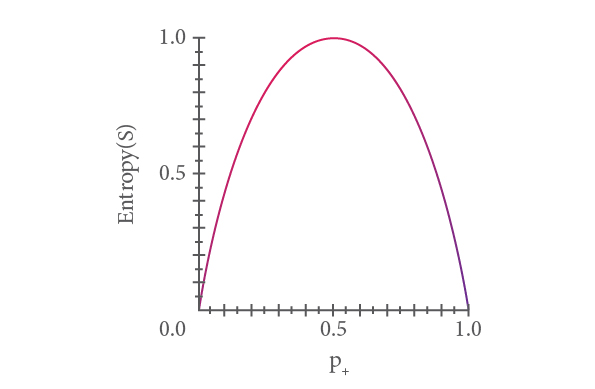

<div dir="rtl" style="text-align: justify"><font face="B Nazanin" size=4>
هر چه مقدار انتروپی بیشتر باشد ابهام درباره‌ی متغیر تصادفی بیشتر است. در مثال  بالا بیشینه‌ی انتروپی بازای مقدار احتمال ۰.۵ (مثلا یک سکه‌ی متوازن) رخ می‌دهد. هر چقدر به احتمال‌های ۰ یا ۱ نزدیک شویم (سکه نامتوازن‌تر شود) مقدار ابهام کم می‌شود.
<br>
بنابراین طبق آن‌چه گفته شد انتروپی به طور شهودی ابهام موجود در توزیع داده‌ها را به ما نشان‌ می‌دهد. از طرف دیگر اشاره شد که هنگام ساختن گره‌ها باید ویژگی‌ای انتخاب شود که دسته‌بندی داده‌ها براساس آن بیشترین یکدستی را در دسته‌های تولید شده، ایجاد کند. بنابراین یک معیار می‌تواند این باشد که این دسته‌بندی چقدر از انتروپی موجود در داده‌ها کاسته است. به این مقدار بهره‌ی اطلاعاتی گفته می‌شود.
</font></div>

$Gain(S, A) = Entropy(S) - \sum_{v \in Values(A)} \frac{|S_v|}{S} Entropy(S_v)$

<div dir="rtl" style="text-align: justify"><font face="B Nazanin" size=4>
که در رابطه‌ی بالا S
مجموعه‌ی داده‌ها در گره قبل از تقسیم‌بندی است، A
ویژگی‌ای است که بر اساس آن داده‌ها تقسیم‌بندی می‌شوند.  Values(A)
مقادیر مختلفی است که ویژگی A
می‌تواند داشته باشد و
$S_v$
زیرمجموعه‌ای از S است که ویژگی A در آنها برابر با $v$ است.
<br>

In [2]:
import pandas as pd
import numpy as np

حال در زیر توابع لازم از جمله آنتروپی و بهره اطلاعاتی را تکمیل کنید.
از این توابع در تعریف کردن مدل یادگیری و انتخاب بهترین ویژگی استفاده خواهیم کرد.

In [35]:
# (10 Points)
def entropy(y):
    """
    return the entropy of input
    """
    ########## [Your Code] ##########
    proportions = np.bincount(y) / len(y)
    ent = -np.sum([p * np.log2(p) for p in proportions if p > 0])
    return ent

def information_gain(x, y, num_samples):
    """
    return the information gain of x
    """
    ########## [Your Code] ##########

    entropy_parent = entropy(y)
    best_gain = -1
    best_threshold = None
    thresholds = np.unique(x)
    # Loop over all thresholds
    for threshold in thresholds:
      # Split data into left and right subsets
      left_idxs = x < threshold
      right_idxs = x >= threshold
      # Skip if split is not valid
      if np.sum(left_idxs) == 0 or np.sum(right_idxs) == 0:
        continue
      # Calculate information gain
      entropy_left = entropy(y[left_idxs])
      entropy_right = entropy(y[right_idxs])
      entropy_children = (np.sum(left_idxs) / num_samples) * entropy_left + \
                          (np.sum(right_idxs) / num_samples) * entropy_right
      gain = entropy_parent - entropy_children
      # Update best split
      if gain > best_gain:
        best_gain = gain
        best_threshold = threshold

    return best_threshold, best_gain

def information_gains(X, y):
    """
    return the information gain of all features
    """
    ########## [Your Code] ##########
    num_samples, num_features = X.shape
    info_gain = dict()
    thre = dict()
    print(X)
    for x in range(num_features):
      thre[x], info_gain[x] = information_gain(X[:,x], y, num_samples)

    return thre, info_gain


<div dir=rtl>
حال در زیر کلاس Node  را تعریف میکنیم که  بیس اصلی مدل ما را تشکیل میدهد .

با استفاده از توابعی که در قسمت قبل نوشتید مدل یادگیری خود را کامل کنید.

In [36]:
# you can add any variable or function to class if you need.
class Node:
    def __init__(self, max_depth=10, min_samples_leaf=1):
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.tree = {}

    def _is_leaf(self):
        return len(self.children) == 0

    def fit(self, X_train, y_train):
        """
        learn the best_feature and create the children of this node
        """
        ########## [Your Code] ##########
        self.tree = self._grow_tree(X_train, y_train)


    def predict(self, X):
        """
        predicte the class of X based on this node best_feature
        """
        ########## [Your Code] ##########
        return np.array([self._predict_tree(x, self.tree) for x in X])

    def _grow_tree(self, X, y, depth=0):
        num_samples, num_features = X.shape
        num_classes = len(np.unique(y))

        # Stopping criteria
        if (depth >= self.max_depth or num_samples < self.min_samples_leaf or num_classes == 1):
            return np.argmax(np.bincount(y))

        # Find best split
        best_feature, best_threshold = self._best_split(X, y)


        # Split data
        left_idxs = X[:, best_feature] < best_threshold
        right_idxs = X[:, best_feature] >= best_threshold

        # Grow subtrees
        left_tree = self._grow_tree(X[left_idxs], y[left_idxs], depth+1)
        right_tree = self._grow_tree(X[right_idxs], y[right_idxs], depth+1)

        return {'feature': best_feature, 'threshold': best_threshold,'left': left_tree,'right': right_tree}


    def _best_split(self, X, y):
      thre, info_gain = information_gains(X, y)
      info_max = max(info_gain.values())
      best_feature = max(info_gain, key=info_gain.get)
      best_thre = thre[best_feature]

      return best_feature, best_thre

    def _predict_tree(self, x, tree):
        # Traverse tree until leaf node is reached
        while isinstance(tree, dict):
            if x[tree['feature']] < tree['threshold']:
                tree = tree['left']
            else:
                tree = tree['right']

        return tree






###Training & Testing

<div dir=rtl>
حال دیتا ست mnist  را لود کنید و با مدل خود لرن کنید و دقت یادگیری را گزارش دهید.


In [18]:
#####################################
#            Your Code              #
#####################################
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# scale data to [0 ,1]
def scaleData(data):
  return (data - np.min(data)) / (np.max(data) - np.min(data))

x_train = np.array(x_train, dtype='float32')
x_test = np.array(x_test, dtype='float32')

for i in range(x_train.shape[0]):
  x_train[i] = scaleData(x_train[i])

for i in range(x_test.shape[0]):
  x_test[i] = scaleData(x_test[i])

#reshape data from 28*28 matrix to 784 array
x_train = np.reshape(x_train, (x_train.shape[0], 784))
x_test = np.reshape(x_test, (x_test.shape[0], 784))

# initializing the pca
from sklearn.decomposition import PCA
pca = PCA()
# implement pca on our data with 10 component
p_components = pca.fit_transform(x_train)
# select 10 components for train and test data
components = pca.components_
E = components[0:10]
x_train = np.dot(x_train, E.T)
x_test = np.dot(x_test, E.T)

print(x_train.shape)
print(x_test.shape)
#convert reduced datasets types to dataframe using pd
#x_train=pd.DataFrame(x_train)
#x_test=pd.DataFrame(x_test)
#y_train=pd.DataFrame(y_train)
#y_test=pd.DataFrame(y_test)

(60000, 10)
(10000, 10)


In [ ]:
dt = Node()
#################################
#   train dt on you train set   #
#          Your Code            #
#################################
dt.fit(x_train, y_train)

Streaming output truncated to the last 5000 lines.
   1.8994353e+00 -2.3504121e+00]
 [ 2.3059261e+00 -2.1183469e+00 -8.1013584e-01 -1.0828218e+00
   1.6337988e+00 -1.5191544e+00  2.7052126e+00  1.1488433e+00
   1.5891163e+00 -1.3071728e+00]
 [ 2.6064448e+00 -2.6754987e-01 -3.1814602e-01 -2.3187840e-01
   3.2858696e+00 -1.9294299e+00  2.0845358e+00 -5.8119386e-01
   2.2505059e+00 -1.1901503e+00]
 [ 3.1078219e+00 -2.0768890e+00 -7.5261450e-01 -8.5991567e-01
   1.7157297e+00 -1.1582971e+00  2.7998691e+00  4.5441559e-01
   1.8872386e+00 -1.9058726e+00]
 [ 6.5696079e-01 -1.7773777e-01 -1.3666546e+00 -1.2825429e+00
   2.1492324e+00 -7.7007151e-01  1.4492784e+00  3.0413848e-01
   2.1811233e+00  8.2518268e-01]
 [ 2.4318030e+00 -5.1338977e-01 -1.0204637e+00 -9.8062944e-01
   2.9731212e+00 -8.3029312e-01  3.3598323e+00  1.3329250e-01
   3.8635581e+00 -4.8760685e-01]
 [ 4.3413754e+00  2.9261947e-01 -2.9037385e+00 -1.0861154e+00
   2.7843909e+00 -1.7269310e+00  1.3044000e+00 -1.1904843e+00
   3.21

In [43]:
#############################
#   report model accuracy   #
#        Your Code          #
#############################
y_pred = dt.predict(x_test)

accuracy = 0
for i in range(x_test.shape[0]):
  if y_test[i]==y_pred[i]:
    accuracy+=1

print(accuracy/x_test.shape[0])

0.8058
